In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
train_dir = 'C:/Users/Fernand/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train'
test_dir = 'C:/Users/Fernand/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/test'

# Crée les datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(224, 224),
    batch_size=64,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(224, 224),
    batch_size=64,
    shuffle=False
)

# Normalisation des pixels
def scale_images(image, label):
    return image / 255.0, label

train_ds = train_ds.map(scale_images)
test_ds = test_ds.map(scale_images)

# Mise en cache + préchargement asynchrone
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Préparation des générateurs
# train_dir = 'C:/Users/Fernand/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/train'
# test_dir = 'C:/Users/Fernand/.cache/kagglehub/datasets/chandrashekarnatesh/poultry-diseases/versions/3/data/data/test'

# datagen = ImageDataGenerator(rescale=1./255)


# train_generator = datagen.flow_from_directory(
#     train_dir,
#     target_size=(224, 224),
#     color_mode='grayscale',  # puisque tu fais .convert('L')
#     batch_size=64,
#     class_mode='categorical'
# )

# test_generator = datagen.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),
#     color_mode='grayscale',
#     batch_size=64,
#     class_mode='categorical'
# )

Found 400000 images belonging to 4 classes.
Found 70677 images belonging to 4 classes.


In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [13]:
train_generator.class_indices

{'Coccidiosis': 0, 'Healthy': 1, 'New Castle Disease': 2, 'Salmonella': 3}

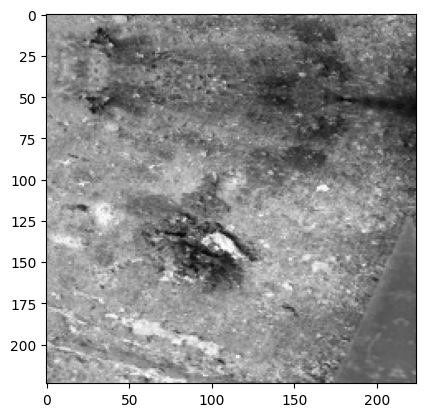

In [14]:

# Display an image from the training set
images, labels = next(train_generator)

# Afficher la première image
plt.imshow(images[0].squeeze(), cmap='gray')  # squeeze enlève la dimension canal

C:\Users\Fernand\AppData\Local\Temp\ipykernel_9684\2849021876.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=counts, palette='viridis', dodge=False)


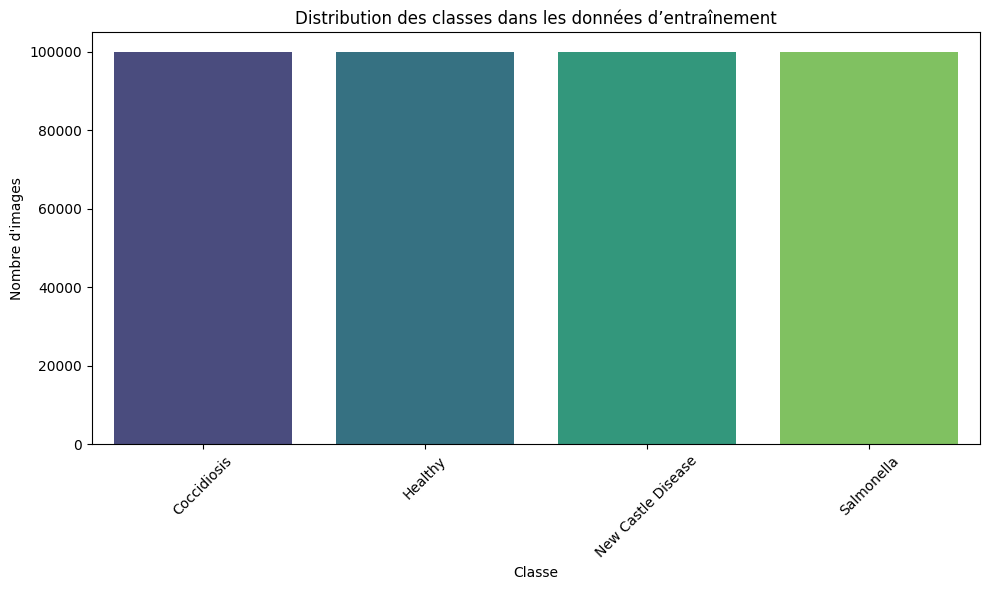

In [15]:
# train_generator.classes contient les indices de classes (0, 1, 2, ...)
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Compter les occurrences
unique_labels, counts = np.unique(train_generator.classes, return_counts=True)

# Mapper les indices vers les noms de classes
label_names = [idx_to_class[idx] for idx in unique_labels]

# Tracer
plt.figure(figsize=(10, 6))
sns.barplot(x=label_names, y=counts, palette='viridis', dodge=False)

plt.title('Distribution des classes dans les données d’entraînement')
plt.ylabel('Nombre d\'images')
plt.xlabel('Classe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# first model
# model = Sequential()
# model.add(Input(shape=(224, 224, 1)))

# model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [17]:
# # second model 
# model = Sequential()
# model.add(Input(shape=(224, 224, 1)))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

In [18]:
# # third model 
# model = Sequential()
# model.add(Input(shape=(224, 224, 1)))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# lr_scheduler = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=2,
#     min_lr=1e-6,
#     verbose=1
# )


# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model.fit(X_train, y_train, epochs=10,
#           validation_data=(X_test, y_test),
#           callbacks=[early_stopping, lr_scheduler])

In [ ]:
# fourth model with batch normalization + padding same
model = Sequential()
model.add(Input(shape=(224, 224, 1)))

# 1st conv block
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# 2nd conv block
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# dense layers
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

# compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# training
model.fit(train_ds, epochs=20,
          validation_data=test_ds,
          callbacks=[early_stopping, lr_scheduler])

Epoch 1/20
2331/6250 [==========>...................] - ETA: 8:41 - loss: 1.5890 - accuracy: 0.5061

<Axes: >

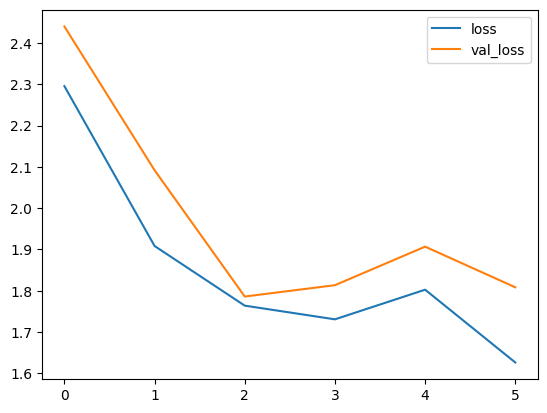

In [19]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

<Axes: >

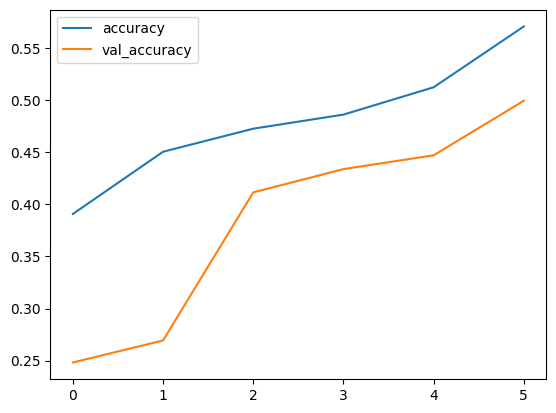

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.evaluate(test_generator)

159/159 ━━━━━━━━━━━━━━━━━━━━ 96s 606ms/step - accuracy: 0.4170 - loss: 1.9233


[1.7859349250793457, 0.41150879859924316]

In [22]:
predictions = np.argmax(model.predict(X_test),axis=1)
print(classification_report(np.argmax(y_test, axis=1), predictions, target_names=label_encoder.classes_))

159/159 ━━━━━━━━━━━━━━━━━━━━ 88s 551ms/step
                    precision    recall  f1-score   support

       Coccidiosis       0.77      0.26      0.39      1273
           Healthy       0.36      0.86      0.50      1254
New Castle Disease       0.43      0.23      0.30      1272
        Salmonella       0.41      0.30      0.34      1258

          accuracy                           0.41      5057
         macro avg       0.49      0.41      0.39      5057
      weighted avg       0.49      0.41      0.39      5057



In [23]:
confusion_matrix(np.argmax(y_test, axis=1),  predictions)

array([[ 334,  501,  169,  269],
       [  16, 1076,   73,   89],
       [  37,  762,  298,  175],
       [  48,  684,  153,  373]])

<Axes: >

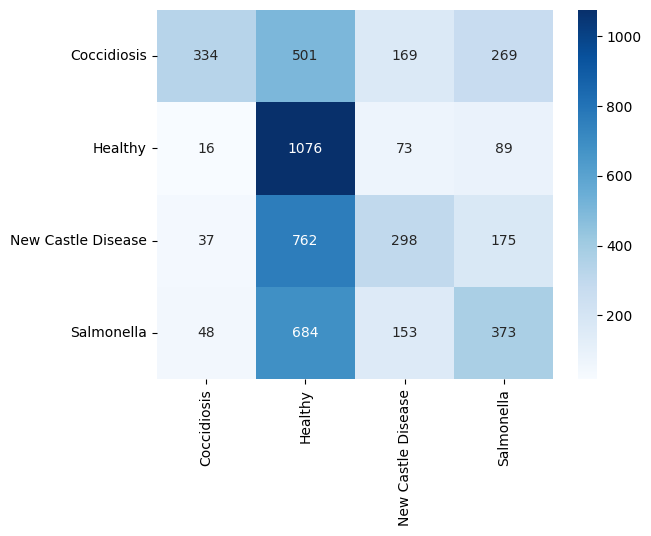

In [24]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1),  predictions), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)